In [31]:
from qiskit import QuantumCircuit , transpile, Aer, assemble , QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram

<h1>Swap test for 1 qubit 2 Quantum States</h1>

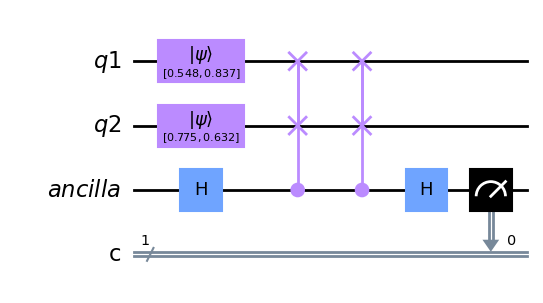

In [32]:
from qiskit.extensions import Initialize
from math import sqrt

# Prepare the the two Quantum States that we wish to compare
state_psi  = [sqrt(0.3),sqrt(0.7)]
state_phi = [sqrt(0.6),sqrt(0.4)]

# Create first Quantum Register for 2 qubits
qr1 = QuantumRegister(1,'q1')

# Create second Quantum Register for 2 qubits
qr2 = QuantumRegister(1,'q2')

# Create Ancilla Quantum Register for 2 qubits
ancilla = QuantumRegister(1,'ancilla')

cr = ClassicalRegister(1, 'c')

# Prepare 3 Qubit Quantum Circuit
qc = QuantumCircuit(qr1,qr2,ancilla,cr)

# Given list of complex amplitudes for the qubit to be initialised to
Initialize_psi = Initialize(state_psi)
Initialize_phi = Initialize(state_phi)

# Assign the Quanutum State psi to the first Qubit and phi to the second qubit
qc.append(Initialize_psi,qr1)
qc.append(Initialize_phi,qr2)

# Create an anciliarry Qubit
qc.h(ancilla)

# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[0],qr1[0],qr2[0])

# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[0],qr2[0],qr1[0])

# Hadamard gate on the ancillary qubit
qc.h(ancilla)

# Measure the ancillary qubit
qc.measure(ancilla,cr)

qc.draw('mpl')

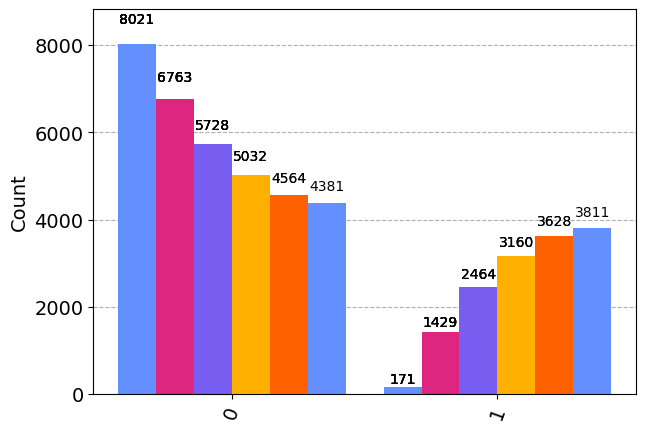

In [33]:
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit import Aer
import matplotlib.pyplot as plt

# Simulate the circuit with varying error rates
err_rt = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
count_list = []

for p in err_rt:
    # Define the error rate 

    # Create a depolarizing error for each gate in the circuit
    error_1 = depolarizing_error(p,1)
    error_3 = depolarizing_error(p,3)

    # Create a noise model and add the error to the gates
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['h'])
    noise_model.add_all_qubit_quantum_error(error_3,['cswap'])

    simulator = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, simulator)

    # Simulate the noisy circuit
    noisy_result = simulator.run(transpiled_qc, noise_model=noise_model, shots=8192).result()

    # Plot the histogram of measurement results
    counts = noisy_result.get_counts()
    count_list.append(counts)

plot_histogram(count_list)
# print(count_list)


In [34]:
# Number of gates and operations 
ops_count = qc.count_ops()
print("The number of Hadamard Gate used ",ops_count.get('h'))
print("The number of CSWAP gates used ",ops_count.get('cswap'))

The number of Hadamard Gate used  2
The number of CSWAP gates used  2


<p></p>

<h1>Swap Test for 2 Qubit 2 Quantum System</h1>

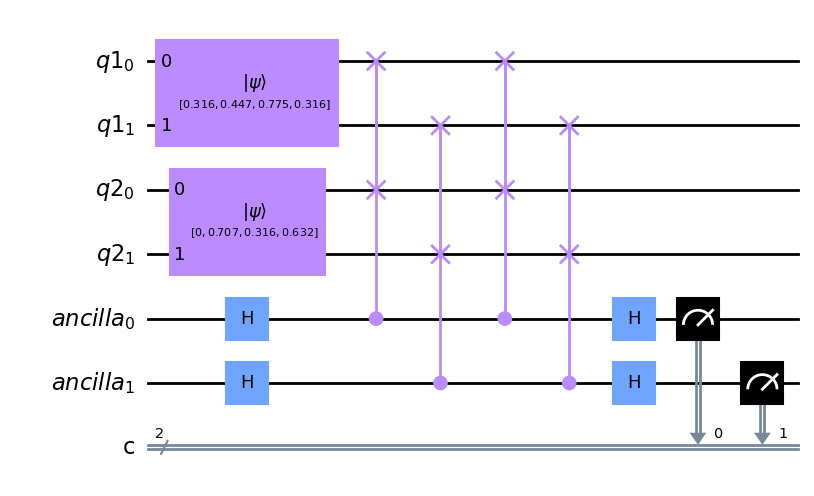

In [35]:
from qiskit import QuantumCircuit , transpile, Aer, assemble , QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from math import sqrt

# Prepare the the two Quantum States that we wish to compare
state_psi  = [sqrt(0.1),sqrt(0.2),sqrt(0.6),sqrt(0.1)]
state_phi = [sqrt(0.0),sqrt(0.5),sqrt(0.1),sqrt(0.4)]

# Create first Quantum Register for 2 qubits
qr1 = QuantumRegister(2,'q1')

# Create second Quantum Register for 2 qubits
qr2 = QuantumRegister(2,'q2')

# Create Ancilla Quantum Register for 2 qubits
ancilla = QuantumRegister(2,'ancilla')

cr = ClassicalRegister(2, 'c')

# Prepare 3 Qubit Quantum Circuit
qc = QuantumCircuit(qr1,qr2,ancilla,cr)

# Given list of complex amplitudes for the qubit to be initialised to
Initialize_psi = Initialize(state_psi)
Initialize_phi = Initialize(state_phi)

# Assign the Quanutum State psi to the first Qubit and phi to the second qubit
qc.append(Initialize_psi,qr1)
qc.append(Initialize_phi,qr2)

# Create an anciliarry Qubit
qc.h(ancilla)

# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[0],qr1[0],qr2[0])
# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[1],qr1[1],qr2[1])


# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[0],qr2[0],qr1[0])
# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[1],qr2[1],qr1[1])

# Hadamard gate on the ancillary qubit
qc.h(ancilla)

# Measure the ancillary qubit
qc.measure(ancilla[0],cr[0])
qc.measure(ancilla[1],cr[1])

qc.draw('mpl')

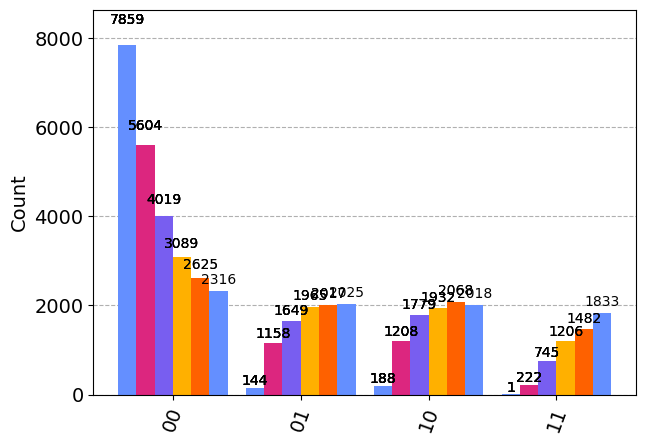

In [36]:
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit import Aer
import matplotlib.pyplot as plt

# Simulate the circuit with varying error rates
err_rt = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
count_list = []

for p in err_rt:
    # Define the error rate 

    # Create a depolarizing error for each gate in the circuit
    error_1 = depolarizing_error(p,1)
    error_3 = depolarizing_error(p,3)

    # Create a noise model and add the error to the gates
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['h'])
    noise_model.add_all_qubit_quantum_error(error_3,['cswap'])

    simulator = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, simulator)

    # Simulate the noisy circuit
    noisy_result = simulator.run(transpiled_qc, noise_model=noise_model, shots=8192).result()

    # Plot the histogram of measurement results
    counts = noisy_result.get_counts()
    count_list.append(counts)

plot_histogram(count_list)
# print(count_list)


In [37]:
# Number of gates and operations 
ops_count = qc.count_ops()
print("The number of Hadamard Gate used ",ops_count.get('h'))
print("The number of CSWAP gates used ",ops_count.get('cswap'))

The number of Hadamard Gate used  4
The number of CSWAP gates used  4


<h1>Swap test for 3 Qubit 2 Quantum System</h1>

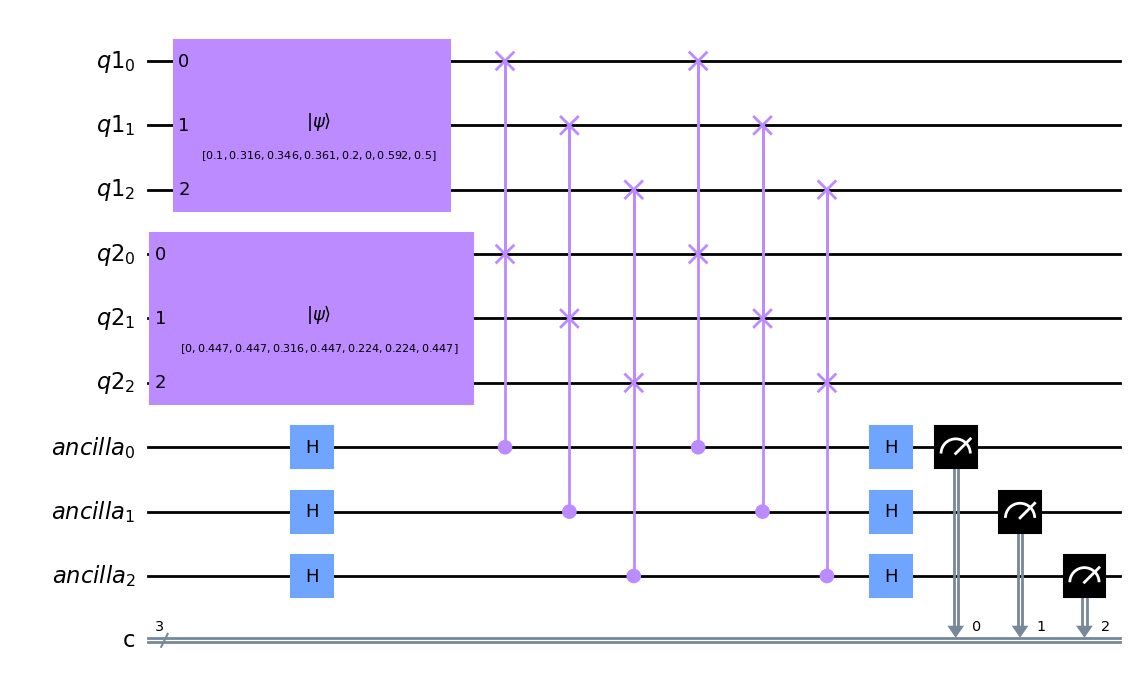

In [38]:
from qiskit import QuantumCircuit , transpile, Aer, assemble , QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from math import sqrt

# Prepare the the two Quantum States that we wish to compare
state_psi  = [sqrt(0.01),sqrt(0.1),sqrt(0.12),sqrt(0.13),sqrt(0.04),sqrt(0.0),sqrt(0.35),sqrt(0.25)]
state_phi = [sqrt(0.0),sqrt(0.2),sqrt(0.2),sqrt(0.1),sqrt(0.2),sqrt(0.05),sqrt(0.05),sqrt(0.2)]

# Create first Quantum Register for 2 qubits
qr1 = QuantumRegister(3,'q1')

# Create second Quantum Register for 2 qubits
qr2 = QuantumRegister(3,'q2')

# Create Ancilla Quantum Register for 2 qubits
ancilla = QuantumRegister(3,'ancilla')

cr = ClassicalRegister(3, 'c')

# Prepare 3 Qubit Quantum Circuit
qc = QuantumCircuit(qr1,qr2,ancilla,cr)

# Given list of complex amplitudes for the qubit to be initialised to
Initialize_psi = Initialize(state_psi)
Initialize_phi = Initialize(state_phi)

# Assign the Quanutum State psi to the first Qubit and phi to the second qubit
qc.append(Initialize_psi,qr1)
qc.append(Initialize_phi,qr2)

# Create an anciliarry Qubit
qc.h(ancilla)

# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[0],qr1[0],qr2[0])
# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[1],qr1[1],qr2[1])
# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(ancilla[2],qr1[2],qr2[2])


# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[0],qr2[0],qr1[0])
# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[1],qr2[1],qr1[1])
# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(ancilla[2],qr2[2],qr1[2])

# Hadamard gate on the ancillary qubit
qc.h(ancilla)

# Measure the ancillary qubit
qc.measure(ancilla[0],cr[0])
qc.measure(ancilla[1],cr[1])
qc.measure(ancilla[2],cr[2])

qc.draw('mpl')

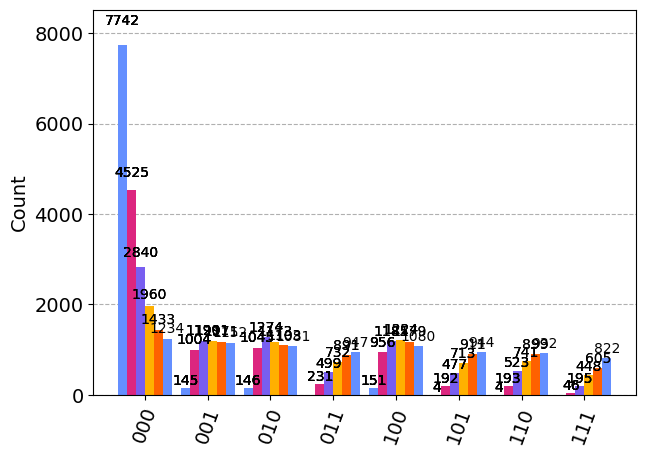

In [39]:
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit import Aer
import matplotlib.pyplot as plt

# Simulate the circuit with varying error rates
err_rt = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
count_list = []

for p in err_rt:
    # Define the error rate 

    # Create a depolarizing error for each gate in the circuit
    error_1 = depolarizing_error(p,1)
    error_3 = depolarizing_error(p,3)

    # Create a noise model and add the error to the gates
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['h'])
    noise_model.add_all_qubit_quantum_error(error_3,['cswap'])

    simulator = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, simulator)

    # Simulate the noisy circuit
    noisy_result = simulator.run(transpiled_qc, noise_model=noise_model, shots=8192).result()

    # Plot the histogram of measurement results
    counts = noisy_result.get_counts()
    count_list.append(counts)

plot_histogram(count_list)
# print(count_list)


In [40]:
# Number of gates and operations 
ops_count = qc.count_ops()
print("The number of Hadamard Gate used ",ops_count.get('h'))
print("The number of CSWAP gates used ",ops_count.get('cswap'))

The number of Hadamard Gate used  6
The number of CSWAP gates used  6


<p>
Limiting Factor :
<br>
Noise: High qubit gate error rates (higher p values) will reduce the success probability of the SWAP test
<br>
<br>
Improvement : 
<br>
Error Correction : Quantum Error Correcting Codes can help improve the reliability of Quantum Computations and help mititgate the effect of noise.
<br>
Increased Qubit Count: Scaling up the number of qubits in a quantum computer can enhance the fault tolerance of quantum algorithms like the SWAP test.
<br>
<br>
Observation : 
<br>
When considering the 2 Quantum States that were of 1 Qubit each . We implemented the SWAP test and evaluated the circuit model with the Error Rate from 0.01 , then taking 0.1 and incrementing in the steps size of 0.1. What we could observe for our 1 Qubit 2 Quantum States is that as we increased the error rate in the ciruit our shots of getting |0> reduced from 8021 (number of shots) to 4381 when the error rate was 0.5 . This shows that as the error rate increases
the probablity of the circuit measuring |0> reduces. The significant limititng factor in this case was the error induced in our gates. The second part fo the observation is the number of gates used as our 2 Quantum States to compare required 3 qubits for the 8d vector, and hence meant 3 times the numbe of gates increasing the overall error in the circuit. 
</p>